In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
import joblib
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import model_from_json
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import encoding_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load the best NN model
model_n = 17
opt = optimizers.Adam()

# load json and create model
model_path = 'NNmodel_{}_with_1.0data.json'.format(model_n)
print(model_path)
weights_path = 'NNmodel_{}_with_1.0data_weights.hdf5'.format(model_n)

json_file = open(model_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_path)
print("Loaded model from disk")

loaded_model.compile(loss='mean_squared_error', optimizer=opt,
                     metrics=['mean_squared_error'])

W0911 17:25:10.993296 139853048669952 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0911 17:25:10.994602 139853048669952 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0911 17:25:10.995733 139853048669952 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ze

NNmodel_17_with_1.0data.json
Loaded model from disk


In [3]:
examples = pd.read_csv('dev_set_raw_data.csv')
#examples.head(10)

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (142,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
examples.head(15)

,TenantId,CreatedDate,CreateDateOfFirstSubscription,CountryCode,AllupSeats,EXOSubscriptionsCount,OD4BSubscriptionsCount,SfBSubscriptionsCount,TeamsSubscriptionsCount,PaidCount,ProjectSubscriptionsCount,SPOSubscriptionsCount,ActivatedSubscriptionTotalCount,VisioSubscriptionsCount,TrialSubscriptionsCount,NonTrialSubscriptionsCount,Languange,DataCenterInstance,DataCenterModel,HasEXO,HasSPO,HasOD4B,HasSfB,HasYammer,HasTeams,HasTeamsFreemium,HasKaizala,HasProPlus,HasAADP,HasAIP,HasAATP,HasIntune,HasMCAS,HasWDATP,HasAudioConference,HasPhoneSystem,HasEdiscovery,HasCompliance,HasThreatIntelligence,HasCustomerLockbox,HasOATP,HasAADPP2,HasAIPP2,HasWindows,HasO365CAS,HasCASDiscovery,HasPAM,HasPowerBI,HasPowerBIPremium,HasPowerBIPro,HasVisio,HasProject,HasNonTrial,HasSubscription_AllCounted,WithoutTenantAdmin,OrgNameEnteredInCommerce,HasPartnerTenants,SignupLocationInfo_Country,SignupLocationInfo_CountryCode,SignupLocationInfo_Region,Subscriptions_HasPaidSeats,TopParents_AreaName,TopParents_BigAreaName,TopParents_CountryCode,TopParents_Industry,TopParents_RegionName,TopParents_SegmentGroup,TopParents_SubRegionName,TopParents_VerticalName,EXOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,SFBEnabledUsers,TeamEnabledUsers,YammerEnabledUsers,PPDEnabledUsers,KaizalaEnabledUsers,AADPEnabledUsers,AIPEnabledUsers,AATPEnabledUsers,IntuneEnabledUsers,MCASEnabledUsers,WDATPEnabledUsers,AudioConferenceEnabledUsers,PhoneSystemEnabledUsers,EdiscoveryEnabledUsers,ComplianceEnabledUsers,ThreatIntelligenceEnabledUsers,CustomerLockboxEnabledUsers,OATPEnabledUsers,AADPP2EnabledUsers,AIPP2EnabledUsers,WindowsEnabledUsers,O365CASEnabledUsers,CASDiscoveryEnabledUsers,PAMEnabledUsers,O365EnabledUsers,EMSEnabledUsers,M365EnabledUsers,O365E5EnabledUsers,EMSE5EnabledUsers,M365E5EnabledUsers,TotalUsers,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidYammerSeats,PaidTeamsSeats,PaidSFBSeats,PaidKaizalaSeats,PaidProplusSeats,PaidAADPSeats,PaidAIPSeats,PaidAATPSeats,PaidIntuneSeats,PaidMCASSeats,PaidWDATPSeats,PaidAudioConferenceSeats,PaidPhoneSystemSeats,PaidOATPSeats,PaidAADPP2Seats,PaidAIPP2Seats,PaidWindowsSeats,PaidO365CASSeats,PaidCASDiscoverySeats,PaidPAMSeats,PaidPowerBISeats,PaidPowerBIPremiumSeats,PaidPowerBIProSeats,PaidEMSSeats,PaidM365Seats,PaidOfficeSeats,HasUsGovCloudOffer,FirstPaidEXOStartDate,FirstPaidSPOStartDate,FirstPaidOD4BStartDate,FirstPaidSfBStartDate,FirstPaidYammerStartDate,FirstPaidTeamsStartDate,FirstPaidProPlusStartDate,FirstPaidAADPStartDate,FirstPaidAIPStartDate,FirstPaidAATPStartDate,FirstPaidIntuneStartDate,FirstPaidMCASStartDate,FirstPaidO365E5SkuStartDate,FirstPaidM365E5SkuStartDate,FirstPaidEMSE5SkuStartDate,Has1YearFreeDomain,AU_exchange_04,AU_sharepoint_04,AU_skype_04,AU_teams_04,AU_od4b_04,AU_onenote_04,AU_word_04,AU_excel_04,AU_powerpoint_04,AU_outlook_04,AU_oatp_04,AU_odsp_04,AU_eslt_04,AU_officeclient_04,AU_exchange_05,AU_sharepoint_05,AU_skype_05,AU_teams_05,AU_od4b_05,AU_onenote_05,AU_word_05,AU_excel_05,AU_powerpoint_05,AU_outlook_05,AU_oatp_05,AU_odsp_05,AU_eslt_05,AU_officeclient_05,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient,AR_exchange_04,AR_sharepoint_04,AR_skype_04,AR_teams_04,AR_od4b_04,AR_onenote_04,AR_word_04,AR_excel_04,AR_powerpoint_04,AR_outlook_04,AR_eslt_04,AR_officeclient_04,AR_exchange_05,AR_sharepoint_05,AR_skype_05,AR_teams_05,AR_od4b_05,AR_onenote_05,AR_word_05,AR_excel_05,AR_powerpoint_05,AR_outlook_05,AR_eslt_05,AR_officeclient_05,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06
0,8A06EA26-549C-4DDF-AF9E-DE3D492F9F43,11/28/2011 5:30:16 PM,8/9/2017 12:00:00 AM,US,18,2,2,1,1,18,1,2,4,0,0,4,en,Global|GoLocal,PublicCloud|GoLocal,True,True,True,True,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [5]:
dv_file = '/data/home/t-chepan/projects/MS-intern-project/Demo_interface/vectorizer.pkl' 
scaler_file = '/data/home/t-chepan/projects/MS-intern-project/Demo_interface/scaler.pkl'
# default_example = {}
dv = joblib.load(dv_file)
scaler = joblib.load(scaler_file)

def encode_input(df, dv, scaler):
    df_X, df_y = encoding_data.separate_input_output_cols(df, predict_ahead=0, previous_usage=0)
    X_scal, _ = encoding_data.encode_dev_test_inputs(df_X, dv, scaler)
    print(X_scal.shape)
    return X_scal, df_y

def decode_output(output, names):
    usage_pattern = {}
    for i, name in enumerate(names):
        usage_pattern[name] = output[i]
    return usage_pattern

def predict_usage_pattern(model, example_df, dv, workload_names, scaler):
    example_input, df_y = encode_input(example_df, dv, scaler)
    output = model.predict(example_input)
    usage_pattern = decode_output(output[0], workload_names)
    return usage_pattern, df_y


In [6]:
outputs_name = [
     'AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06'
]

In [7]:
set(examples['TopParents_Industry'])

{'0',
 'Automotive',
 'Banking & Capital Markets',
 'Chemicals & Agrochemicals',
 'Consumer Goods',
 'Defense & Intelligence',
 'Discrete Manufacturing',
 'Energy',
 'Forestry & Fishing',
 'Health Payor',
 'Health Provider',
 'Higher Education',
 'Insurance',
 'Libraries & Museums',
 'Local Regional Government',
 'Media & Entertainment',
 'National Government',
 'Nonprofit',
 'Other - Unsegmented',
 'Partner Professional Services',
 'Pharmaceuticals',
 'Primary & Secondary Edu/K-12',
 'Professional Services',
 'Retailers',
 'Smart Spaces',
 'Telecommunications',
 'Travel & Transportation'}

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
(1, 489)
{'AR_skype_06': 0.03155472, 'AR_exchange_06': 0.5173764, 'AR_excel_06': 0.27335122, 'AR_onenote_06': 0.052381393, 'AR_powerpoint_06': 0.06516223, 'AR_outlook_06': 0.41832116, 'AR_od4b_06': 0.28946918, 'AR_eslt_06': 0.6718098, 'AR_sharepoint_06': 0.4791658, 'AR_word_06': 0.21473786, 'AR_officeclient_06': 0.4854141, 'AR_teams_06': 0.024146631}


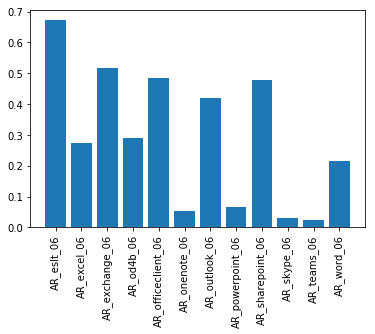

In [15]:
## the default example has 4 PaidCount, use a lot of eslt and exo workloads
default_example_df = examples.iloc[1:2,:].copy()


employee = 100

default_example_df['PaidCount'] = employee
default_example_df['AU_exchange'] = employee * 0.4
# default_example_df['AU_eslt'] = 40.0
default_example_df['AU_officeclient'] = employee * 0.5
# default_example_df['Languange'] = 'es'
# default_example_df['Languange'] = 'en'

# default_example_df['TopParents_Industry'] = '0'
default_example_df['TopParents_Industry'] = 'Partner Professional Services'

usage_pattern, df_y = predict_usage_pattern(loaded_model, default_example_df, dv, outputs_name, scaler)
print(usage_pattern)
lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
(1, 489)
{'AR_skype_06': 0.022562452, 'AR_exchange_06': 0.71411544, 'AR_excel_06': 0.2507756, 'AR_onenote_06': 0.017055336, 'AR_powerpoint_06': 0.057082824, 'AR_outlook_06': 0.52371514, 'AR_od4b_06': 0.09714748, 'AR_eslt_06': 0.717592, 'AR_sharepoint_06': 0.0873736, 'AR_word_06': 0.21920307, 'AR_officeclient_06': 0.55674845, 'AR_teams_06': 0.059497803}


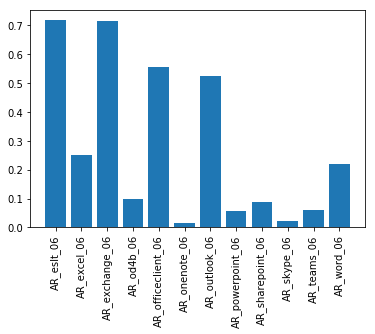

In [11]:
## the default example has 67 PaidCount, use both eslt and office workloads
default_example_df = examples.iloc[8:9,:].copy()

employee = 150

default_example_df['PaidCount'] = employee
# default_example_df['AU_exchange'] = employee * 0.
default_example_df['AU_eslt'] = employee * 0.8
default_example_df['AU_officeclient'] = employee * 0.5
# default_example_df['Languange'] = 'es'
default_example_df['Languange'] = 'en'
# default_example_df['TopParents_Industry'] = 'Telecommunications'
default_example_df['TopParents_Industry'] = 'Partner Professional Services'
usage_pattern, df_y = predict_usage_pattern(loaded_model, default_example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
(1, 489)
{'AR_eslt_06': 1.5499232, 'AR_word_06': 0.45004755, 'AR_officeclient_06': 0.9097178, 'AR_exchange_06': 1.665549, 'AR_powerpoint_06': 0.074376345, 'AR_teams_06': 0.06368717, 'AR_onenote_06': 0.008771977, 'AR_skype_06': 0.03669513, 'AR_od4b_06': 0.11049005, 'AR_sharepoint_06': 0.1671589, 'AR_excel_06': 0.4526645, 'AR_outlook_06': 0.84500337}


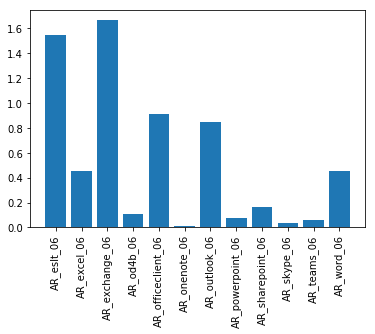

In [12]:
default_example_df['PaidCount'] = 20
default_example_df['CountryCode'] = 'US'
default_example_df['TopParents_Industry'] = 'Banking & Capital Markets'

usage_pattern, df_y = predict_usage_pattern(loaded_model, default_example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

